http://pystra.github.io/pystra/tutorial.html

Instalación de la librería pystra



In [2]:
!wget https://github.com/pystra/pystra/archive/refs/heads/master.zip
!pip install master.zip

--2022-03-30 11:22:44--  https://github.com/pystra/pystra/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pystra/pystra/zip/refs/heads/master [following]
--2022-03-30 11:22:44--  https://codeload.github.com/pystra/pystra/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   1.10M  --.-KB/s    in 0.08s   

2022-03-30 11:22:45 (13.5 MB/s) - ‘master.zip’ saved [1152117]

Processing ./master.zip
  Created wheel for pystra: filename=pystra-0.1.0-py3-none-any.whl size=42659 sha256=3dd7719558358876000558acf785eaf00214c28d8d8ee97

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pystra import *

# Definición del problema

Función de falla

In [4]:
def funcion_de_falla(H,gamma,c,phi):
  phi_rad = np.deg2rad(phi)
  Ka=np.tan(np.pi/4 - phi_rad/2)**2
  g = 2*c*np.sqrt(Ka)*H-0.5*gamma*Ka*(H**2)  
  return g

Creo el modelo

In [5]:
limit_state = LimitState(funcion_de_falla)
stochastic_model = StochasticModel()

Variables aleatorias

In [6]:
stochastic_model.addVariable(Normal('H',10,1))
stochastic_model.addVariable(Normal('gamma',20,1))
stochastic_model.addVariable(Normal('c',40,8))
# stochastic_model.addVariable(Normal('c',35,2))
stochastic_model.addVariable(Normal('phi',30,2))

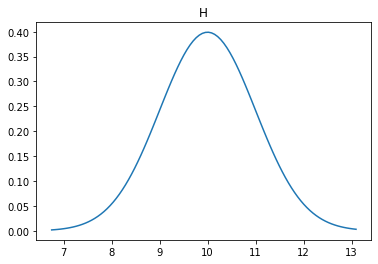

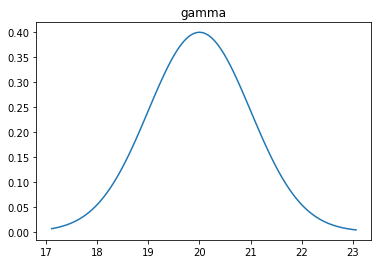

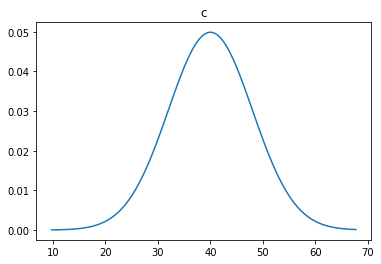

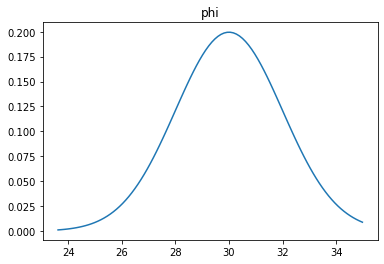

In [7]:
stochastic_model.variables["H"].plot()
stochastic_model.variables["gamma"].plot()
stochastic_model.variables["c"].plot()
stochastic_model.variables["phi"].plot()

Matriz de correlación

In [9]:
#matriz diagonal porque las variables son independientes
stochastic_model.setCorrelation( CorrelationMatrix([[1,0,0,0],
                                                      [0,1,0,0],
                                                      [0,0,1,0],
                                                      [0,0,0,1]]))

#Montecarlo


           RUNNING RELIABILITY ANALYSIS


 Computation of modified correlation matrix R0
 Takes some time if sensitivities are to be computed
 with gamma (3), beta (7) or chi-square (8)
 distributions.
 Please wait... (Ctrl+C breaks)



 RESULTS FROM RUNNING CRUDE MONTE CARLO SIMULATION

 Reliability index beta:        1.2944790533171155
 Failure probability:           0.09775
 Coefficient of variation of Pf 0.04803691036102601
 Number of simulations:         4000




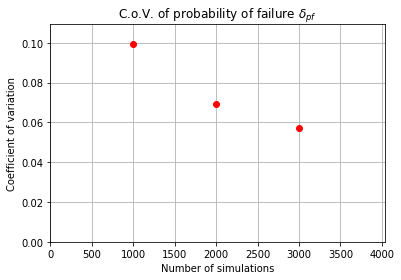

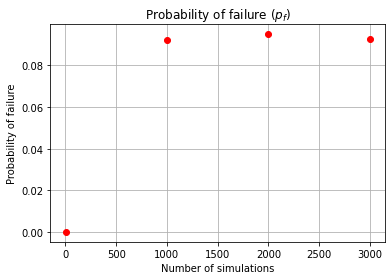

In [8]:
optionsMC = AnalysisOptions()
optionsMC.printResults(True)
# optionsMC.target_cov = 0.03 #con este numero controlo la cantidad de iteraciones del montecarlo

AnalysisMC = CrudeMonteCarlo(analysis_options=optionsMC,stochastic_model=stochastic_model,limit_state=limit_state)

# FORM

In [10]:
optionsFORM = AnalysisOptions()
optionsFORM.printResults(False)
# optionsFORM.target_cov = 0.005

AnalysisFORM = Form(analysis_options=optionsFORM, stochastic_model=stochastic_model, limit_state=limit_state)
AnalysisFORM.showDetailedOutput()


FORM
Pf              	 1.0096337946e-01
BetaHL          	 1.2760813632
Model Evaluations 	 4038
------------------------------------------------------
Variable   	    U_star 	       X_star 	     alpha
H          	  0.428915 	    10.428915 	 +0.336245
gamma      	  0.221359 	    20.221359 	 +0.173397
c          	 -1.167530 	    30.659764 	 -0.914901
phi        	 -0.179696 	    29.640607 	 -0.140814



In [11]:
AnalysisFORM.getDesignPoint(uspace=False)

array([10.42891459, 20.2213591 , 30.6597635 , 29.64060705])